In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [32]:
ubicacion = r"C:\Users\randy\EBAC.PRACTICAS\Amazon.xlsx"
data = pd.read_excel('Amazon.xlsx')
data.head()

,Unnamed: 0,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,Adam,205,3,345,235,24,23,26,21,17
1,Anna,9,15,315,33,25,4,42,215,28
2,Bernard,17,26,285,3,43,27,41,26,33
3,Edward,135,5,355,295,18,23,39,195,17
4,Emilia,3,45,48,39,34,46,225,34,43


In [33]:
names = data['Unnamed: 0']

In [34]:
dt_num = data.drop('Unnamed: 0', axis=1)

In [35]:
from sklearn.preprocessing import normalize
data_scale = normalize(dt_num)
data_scale

array([[0.43826336, 0.00641361, 0.73756517, 0.50239946, 0.05130888,
        0.04917101, 0.05558462, 0.04489527, 0.03634379],
       [0.02323527, 0.03872544, 0.81323434, 0.08519598, 0.06454241,
        0.01032679, 0.10843125, 0.55506471, 0.0722875 ],
       [0.05723452, 0.08753514, 0.95951982, 0.01010021, 0.14476966,
        0.09090188, 0.13803618, 0.08753514, 0.11110229],
       [0.25885639, 0.00958727, 0.68069644, 0.56564916, 0.03451419,
        0.04410146, 0.07478074, 0.37390368, 0.03259673],
       [0.01197502, 0.17962533, 0.19160036, 0.15567529, 0.13571692,
        0.18361701, 0.89812667, 0.13571692, 0.17164198],
       [0.14494006, 0.251738  , 0.60264551, 0.03661644, 0.03966781,
        0.02898801, 0.73995715, 0.03356507, 0.00457705],
       [0.04755854, 0.02481315, 0.98218723, 0.06823617, 0.07237169,
        0.09304932, 0.07857498, 0.05996511, 0.06410064],
       [0.13323393, 0.04304481, 0.06354234, 0.52268696, 0.05739308,
        0.04509456, 0.70716471, 0.44069685, 0.05944283],


In [36]:
data_scale = pd.DataFrame(data_scale, columns=dt_num.columns)
data_scale.head()

,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,0.438263,0.006414,0.737565,0.502399,0.051309,0.049171,0.055585,0.044895,0.036344
1,0.023235,0.038725,0.813234,0.085196,0.064542,0.010327,0.108431,0.555065,0.072287
2,0.057235,0.087535,0.959520,0.010100,0.144770,0.090902,0.138036,0.087535,0.111102
3,0.258856,0.009587,0.680696,0.565649,0.034514,0.044101,0.074781,0.373904,0.032597
4,0.011975,0.179625,0.191600,0.155675,0.135717,0.183617,0.898127,0.135717,0.171642


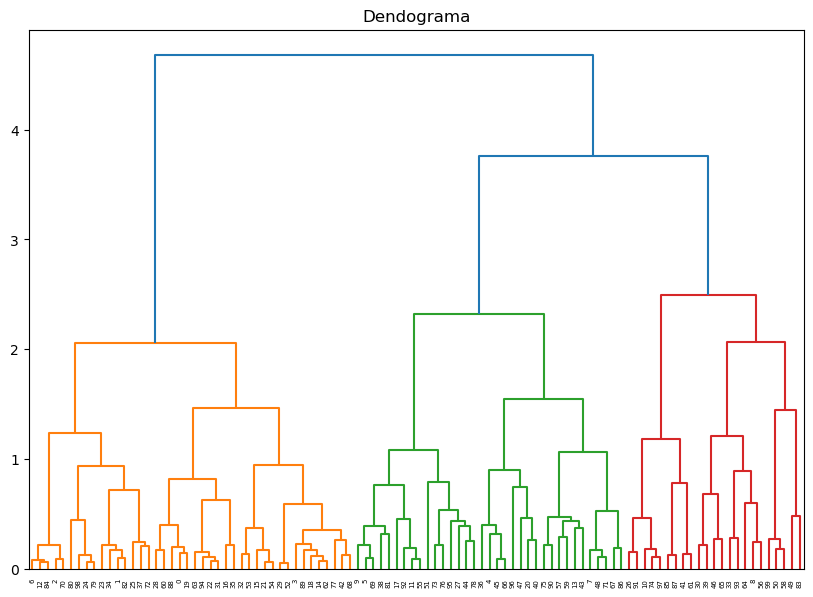

In [37]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('Dendograma')
dend = shc.dendrogram(shc.linkage(data_scale, method='ward'))

In [38]:
print(dend['color_list'])

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C0', 'C0']


In [39]:
colores_unicos = set(dend['color_list'])
colores_unicos

{'C0', 'C1', 'C2', 'C3'}

In [40]:
num_clusters_optimo = len(colores_unicos) - 1
num_clusters_optimo

3

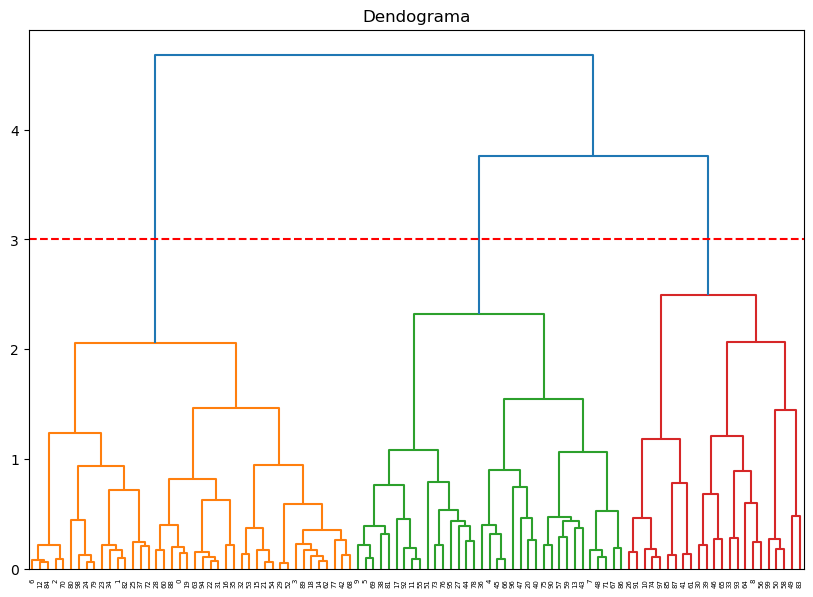

In [41]:
plt.figure(figsize=(10,7))
plt.title('Dendograma')
dend = shc.dendrogram(shc.linkage(data_scale, method='ward'))
plt.axhline(y=3, color='r', linestyle='--')

In [42]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward') # n_clusters=2 sirve para dar valor de 2 a los clusters
# affinity: 'euclidean' es la distancia entre los puntos, linkage: 'ward' es el método de agrupamiento

grupos = cluster.fit_predict(data_scale)
grupos

c:\Users\randy\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0,
       2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 1, 2, 0, 2, 0, 1, 2, 2, 0, 1, 0], dtype=int64)

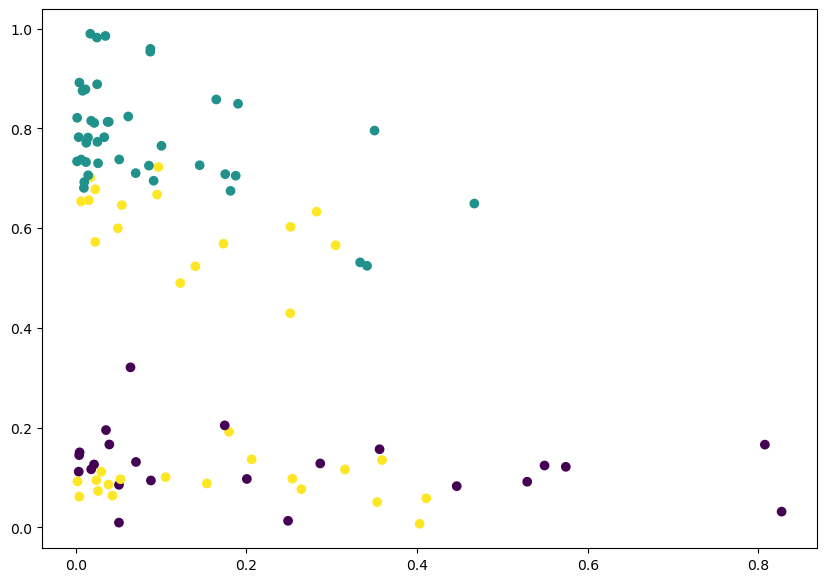

In [43]:
plt.figure(figsize=(10,7))
plt.scatter(data_scale['Precio'], data_scale['Durabilidad'], c= cluster.labels_)

In [44]:
# Separacion de grupos mediante PCA
campos = data_scale.values
print(campos)

[[0.43826336 0.00641361 0.73756517 0.50239946 0.05130888 0.04917101
  0.05558462 0.04489527 0.03634379]
 [0.02323527 0.03872544 0.81323434 0.08519598 0.06454241 0.01032679
  0.10843125 0.55506471 0.0722875 ]
 [0.05723452 0.08753514 0.95951982 0.01010021 0.14476966 0.09090188
  0.13803618 0.08753514 0.11110229]
 [0.25885639 0.00958727 0.68069644 0.56564916 0.03451419 0.04410146
  0.07478074 0.37390368 0.03259673]
 [0.01197502 0.17962533 0.19160036 0.15567529 0.13571692 0.18361701
  0.89812667 0.13571692 0.17164198]
 [0.14494006 0.251738   0.60264551 0.03661644 0.03966781 0.02898801
  0.73995715 0.03356507 0.00457705]
 [0.04755854 0.02481315 0.98218723 0.06823617 0.07237169 0.09304932
  0.07857498 0.05996511 0.06410064]
 [0.13323393 0.04304481 0.06354234 0.52268696 0.05739308 0.04509456
  0.70716471 0.44069685 0.05944283]
 [0.73804829 0.0214705  0.12613916 0.63069581 0.09393342 0.00805144
  0.10198485 0.07246292 0.12882297]
 [0.00348086 0.30457545 0.56564012 0.00522129 0.06439595 0.05569

In [45]:
from sklearn import decomposition # Descomposicion de datos
# from sklearn.decomposition import PCA # PCA: Analisis de componentes principales
pca = decomposition.PCA(n_components=2) # n_components=2 es el número de componentes principales que se desean obtener
pca.fit(campos)
campos = pca.transform(campos)
campos

array([[-0.39993219,  0.06035374],
       [-0.40829583, -0.06402268],
       [-0.49703182, -0.35955286],
       [-0.33996675,  0.18434501],
       [ 0.58207751, -0.38797653],
       [ 0.1723403 , -0.52962573],
       [-0.56528441, -0.33770585],
       [ 0.5335887 ,  0.06994712],
       [ 0.09981604,  0.47165743],
       [ 0.22195207, -0.56503313],
       [ 0.08274005,  0.39712712],
       [-0.00143465, -0.48936583],
       [-0.57292039, -0.35927774],
       [ 0.51350639,  0.01301312],
       [-0.35272162,  0.20639728],
       [-0.4688626 ,  0.0168001 ],
       [-0.25142488,  0.04599019],
       [-0.05456876, -0.22302796],
       [-0.36123131,  0.20553368],
       [-0.41087067,  0.02173183],
       [ 0.54207892, -0.03308916],
       [-0.5138909 , -0.0900875 ],
       [-0.4284552 , -0.0601418 ],
       [-0.42320562, -0.09945498],
       [-0.42610215,  0.06318626],
       [-0.10615885, -0.20376697],
       [ 0.19058214,  0.3966612 ],
       [-0.096838  , -0.33104612],
       [-0.51505714,

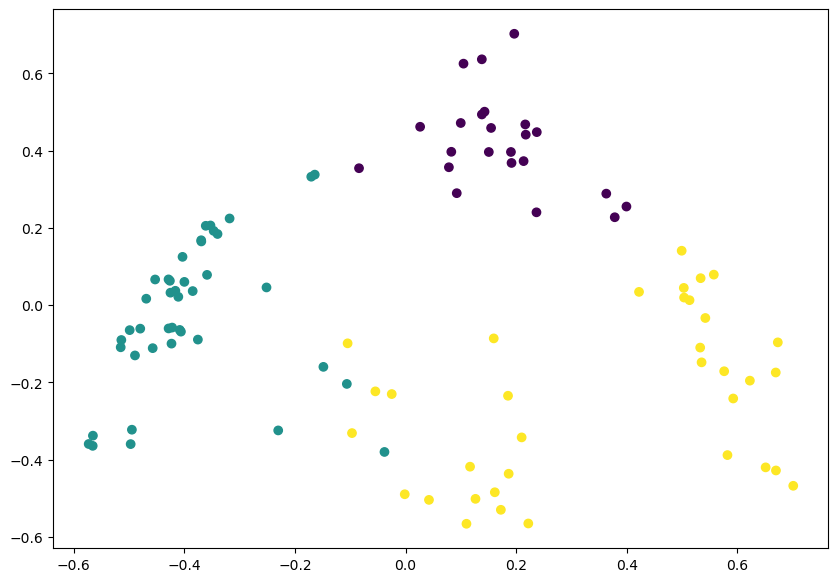

In [46]:
plt.figure(figsize=(10,7))
plt.scatter(campos[:,0], campos[:,1], c = cluster.labels_)

In [47]:
dataframe = pd.DataFrame(grupos, columns=['Grupo']) # esto sirve para crear un nuevo dataframe con los grupos
dataframe

,Grupo
0,1
1,1
2,1
3,1
4,2
5,2
6,1
7,2
8,0
9,2


In [48]:
dataframe2 = pd.concat([data, dataframe], axis=1, join = 'inner') # esto sirve para concatenar el dataframe original con el nuevo dataframe de grupos
dataframe2

,Unnamed: 0,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,Grupo
0,Adam,205,3,345,235,24,23,26,21,17,1
1,Anna,9,15,315,33,25,4,42,215,28,1
2,Bernard,17,26,285,3,43,27,41,26,33,1
3,Edward,135,5,355,295,18,23,39,195,17,1
4,Emilia,3,45,48,39,34,46,225,34,43,2
5,Fabian,95,165,395,24,26,19,485,22,3,2
6,Philip,23,12,475,33,35,45,38,29,31,1
7,Frank,65,21,31,255,28,22,345,215,29,2
8,Xavier,275,8,47,235,35,3,38,27,48,0
9,Gabriel,2,175,325,3,37,32,435,27,39,2


In [49]:
pd.options.display.max_rows = None
dataframe2

,Unnamed: 0,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,Grupo
0,Adam,205,3,345,235,24,23,26,21,17,1
1,Anna,9,15,315,33,25,4,42,215,28,1
2,Bernard,17,26,285,3,43,27,41,26,33,1
3,Edward,135,5,355,295,18,23,39,195,17,1
4,Emilia,3,45,48,39,34,46,225,34,43,2
5,Fabian,95,165,395,24,26,19,485,22,3,2
6,Philip,23,12,475,33,35,45,38,29,31,1
7,Frank,65,21,31,255,28,22,345,215,29,2
8,Xavier,275,8,47,235,35,3,38,27,48,0
9,Gabriel,2,175,325,3,37,32,435,27,39,2


# 1- ¿Qué productos recomendaría a Salomé?

In [ ]:
# A Salome le recomentaria comprar los mismos productos que Emilia ya que ambos pertenecen al mismo grupos (2)

# ¿Qué productos recomendaría a Stephanía?

In [51]:
# A Stephania le recomentaria comprar los mismos productos que Adam ya que ambos pertenecen al mismo grupo (1)

# ¿Qué productos recomendaría a Lydia?

In [52]:
# A Lydia le recomentaria comprar los mismos productos que Stephania ya que ambos pertenecen al mismo grupo (1)